In [47]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.utils import to_categorical

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
%matplotlib inline

Loaded 2122 images of 12 classes
(2122, 128, 128, 3)


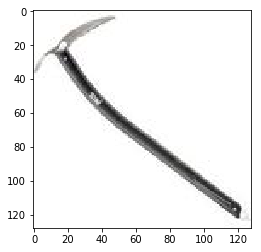

In [48]:
classNames = []
features = []
labels = []

classNameId = 0

rootdir = "resizedGearImages"

classNames = os.listdir(rootdir)

for folder in classNames:
    files = os.listdir(os.path.join(rootdir,folder))
    for file in files:
        img = Image.open(os.path.join(rootdir,folder,file))
        features.append(np.array(img))
        labels.append(classNameId)
    classNameId+=1
    
features = np.array(features)
labels = np.array(labels)

print("Loaded {} images of {} classes".format(len(features),len(classNames)))

print(features.shape)
plt.figure()
plt.imshow(features[0])
plt.grid(False)

In [60]:
# split the image data into training and testing sets
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size=0.30)

xTrain = xTrain / 255.0
xTest = xTest / 255.0

#Make categorical labels
yTrain = np_utils.to_categorical(yTrain, len(classNames))
yTrain = yTrain.astype('float32')
yTest = np_utils.to_categorical(yTest, len(classNames))
yTest = yTest.astype('float32')

print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(1485, 128, 128, 3)
(637, 128, 128, 3)
(1485, 12)
(637, 12)


TypeError: only integer scalar arrays can be converted to a scalar index

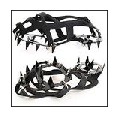

In [57]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xTrain[i])
    plt.xlabel(classNames[yTrain[i]])

In [62]:

model = Sequential()
model.add(Conv2D(32, (6, 6), input_shape=(xTrain.shape[1],xTrain.shape[2],xTrain.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(len(classNames), activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

numEpochs = 20
history = model.fit(xTrain, yTrain, epochs=numEpochs, batch_size=64, validation_data=(xTest, yTest))

Train on 1485 samples, validate on 637 samples
Epoch 1/20
1485/1485 [==============================] - 92s 62ms/step - loss: 2.1730 - acc: 0.2970 - val_loss: 1.7211 - val_acc: 0.4976
Epoch 2/20
1485/1485 [==============================] - 87s 59ms/step - loss: 1.1282 - acc: 0.6471 - val_loss: 0.8258 - val_acc: 0.7237
Epoch 3/20
1485/1485 [==============================] - 87s 59ms/step - loss: 0.7475 - acc: 0.7481 - val_loss: 0.6279 - val_acc: 0.8148
Epoch 4/20
1485/1485 [==============================] - 88s 59ms/step - loss: 0.6084 - acc: 0.7939 - val_loss: 0.5330 - val_acc: 0.8116
Epoch 5/20
1485/1485 [==============================] - 88s 60ms/step - loss: 0.4855 - acc: 0.8377 - val_loss: 0.5210 - val_acc: 0.8399
Epoch 6/20
1485/1485 [==============================] - 87s 59ms/step - loss: 0.4068 - acc: 0.8620 - val_loss: 0.4412 - val_acc: 0.8587
Epoch 7/20
1485/1485 [==============================] - 87s 59ms/step - loss: 0.3743 - acc: 0.8667 - val_loss: 0.3847 - val_acc: 0.8697
E

In [63]:
testLoss, testAcc = model.evaluate(xTest, yTest)

print('Test accuracy:', testAcc)

637/637 [==============================] - 13s 20ms/step
Test accuracy: 0.8901098913263115


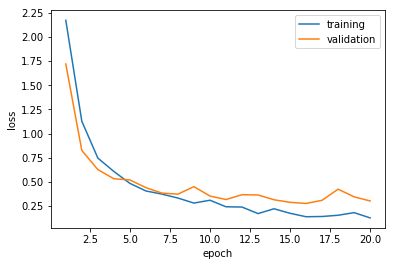

In [64]:
%matplotlib inline
from matplotlib import pyplot as plt

epochNums = range(1,numEpochs+1)
trainingLoss = history.history["loss"]
validationLoss = history.history["val_loss"]
plt.plot(epochNums, trainingLoss)
plt.plot(epochNums, validationLoss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

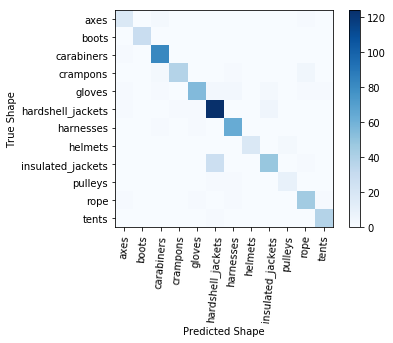

In [66]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

predictions = model.predict(xTest)
highestPredictions = np.argmax(predictions, axis=1)
trueLabels = np.argmax(yTest, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(trueLabels, highestPredictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tickMarks = np.arange(len(classNames))
plt.xticks(tickMarks, classNames, rotation=85)
plt.yticks(tickMarks, classNames)
plt.xlabel("Predicted Shape")
plt.ylabel("True Shape")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

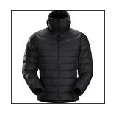

In [68]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(12), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
numRows = 6
numCols = 5
numImages = numRows*numCols
plt.figure(figsize=(2*2*numCols, 2*numRows))
for i in range(numImages):
  plt.subplot(numRows, 2*numCols, 2*i+1)
  plot_image(i, predictions, yTest, xTest)
  plt.subplot(numRows, 2*numCols, 2*i+2)
  plot_value_array(i, predictions, yTest)